In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [100]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [101]:
file = '2013~2023 한국 기온,습도,풍속.csv'

In [102]:
df = pd.read_csv(file, encoding = 'cp949')

In [103]:
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
0,105,강릉,2013-01-01,-1.9,3.8,-6.7,50.6,2.9
1,105,강릉,2013-01-02,-6.0,-1.3,-9.9,29.9,4.4
2,105,강릉,2013-01-03,-7.5,-0.7,-11.1,25.8,4.0
3,105,강릉,2013-01-04,-4.9,1.8,-10.6,31.1,3.2
4,105,강릉,2013-01-05,-1.7,2.8,-5.4,30.4,4.3
...,...,...,...,...,...,...,...,...
62059,184,제주,2023-08-11,29.6,34.1,26.6,64.6,4.0
62060,184,제주,2023-08-12,29.7,33.3,27.2,66.6,2.7
62061,184,제주,2023-08-13,29.2,32.6,26.3,65.3,3.0
62062,184,제주,2023-08-14,28.9,32.3,26.4,69.9,3.4


In [104]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_korea.head(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
2013-01-06,-2.32500,2.52500,-5.73750,57.04375,1.96875
2013-01-07,-2.00625,3.35000,-6.72500,49.62500,1.95000
2013-01-08,-1.22500,3.76875,-5.28750,50.66250,2.15625
2013-01-09,-4.01875,-0.80625,-7.14375,45.38125,3.41250


In [105]:
df_korea.tail(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2023-08-06,29.40625,33.70000,26.15625,74.78750,1.95000
2023-08-07,29.28750,33.62500,26.05625,74.49375,2.43750
2023-08-08,29.08125,33.11875,25.81875,71.57500,2.92500
2023-08-09,26.48125,28.96250,24.30625,81.06250,3.91875
2023-08-10,23.74375,25.91875,22.36875,88.73125,4.73125
2023-08-11,26.24375,29.97500,22.85625,79.02500,2.83750
2023-08-12,25.86250,29.23125,23.14375,81.25000,1.88125
2023-08-13,26.88750,31.00625,23.51875,77.77500,1.60000
2023-08-14,27.40000,31.66250,24.34375,77.50000,1.77500


In [106]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3879 entries, 2013-01-01 to 2023-08-15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   평균기온(℃)    3879 non-null   float64
 1   최고기온(℃)    3879 non-null   float64
 2   최저기온(℃)    3879 non-null   float64
 3   평균습도(%rh)  3879 non-null   float64
 4   평균풍속(m/s)  3879 non-null   float64
dtypes: float64(5)
memory usage: 181.8+ KB


In [107]:
df_korea.tail()

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2023-08-11,26.24375,29.97500,22.85625,79.0250,2.83750
2023-08-12,25.86250,29.23125,23.14375,81.2500,1.88125
2023-08-13,26.88750,31.00625,23.51875,77.7750,1.60000
2023-08-14,27.40000,31.66250,24.34375,77.5000,1.77500
2023-08-15,27.23750,31.21250,24.21250,76.5875,2.12500


In [108]:
df_korea = df_korea.reset_index()

In [109]:
df_korea['일시']  = pd.to_datetime(df_korea['일시'])
df_korea.set_index('일시', inplace = True)

Text(0.5, 1.0, '10년간 일별 평균기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


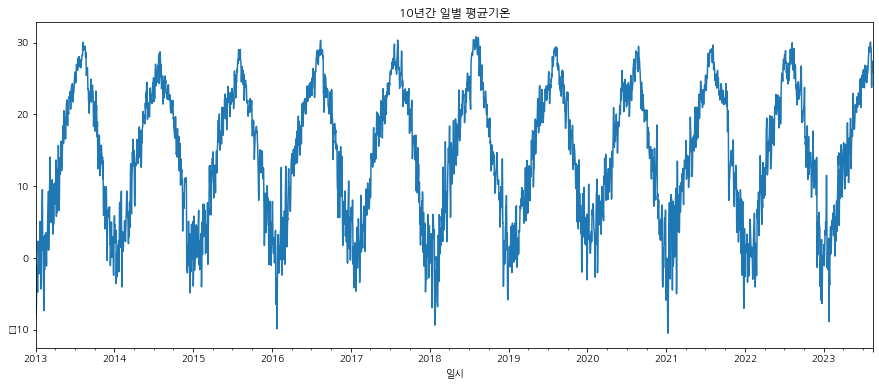

In [110]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균기온(℃)'].plot()
axe.set_title('10년간 일별 평균기온')

Text(0.5, 1.0, '10년간 일별 최저기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


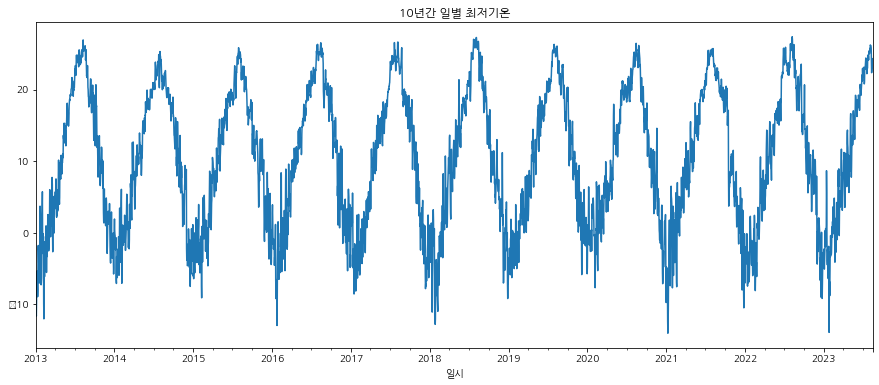

In [111]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['최저기온(℃)'].plot()
axe.set_title('10년간 일별 최저기온')
# 겨울의 병원균을 옮기는 곤충, 동물, 조류들이 동면이 가능한지 보기위한 columns

Text(0.5, 1.0, '10년간 일별 평균습도')

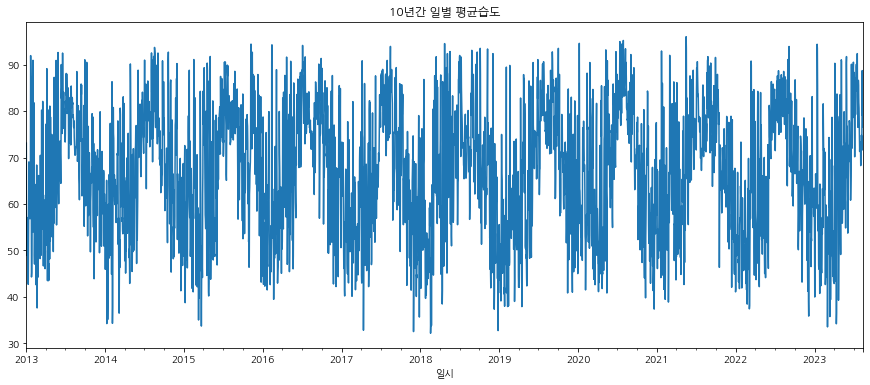

In [112]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균습도(%rh)'].plot()
axe.set_title('10년간 일별 평균습도')

Text(0.5, 1.0, '10년간 일별 평균풍속')

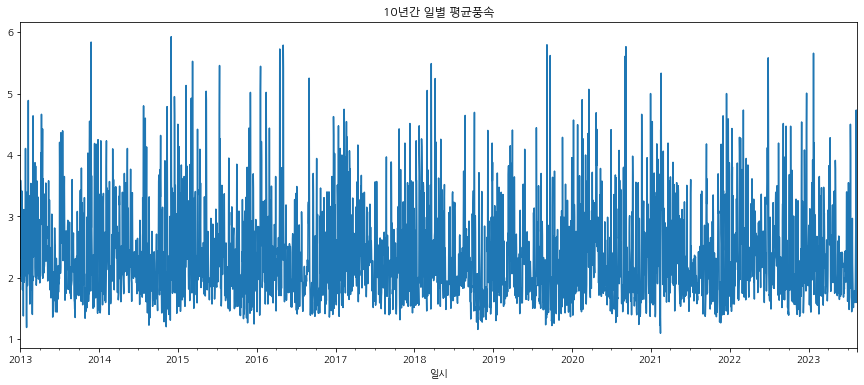

In [113]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균풍속(m/s)'].plot()
axe.set_title('10년간 일별 평균풍속')

## Data Processing

In [114]:
n_col = 1
dataset = df_korea['평균기온(℃)']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(3879, 1)

In [115]:
scaler = MinMaxScaler(feature_range = (0 , 1))
scaled_data = scaler.fit_transform(np.array(data))

## Splitting Data

In [116]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size
print('Train Size :', train_size, 'Test Size : ', test_size)

Train Size : 2909 Test Size :  970


In [117]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(2909, 1)

## Creating Data Set

In [118]:
x_train = []
y_train = []
time_step = 60
n_col = 1

for i in range(time_step, len(scaled_data)):
    x_train.append(scaled_data[i-time_step:i, :n_col])
    y_train.append(scaled_data[i, :n_col])
    if i <= time_step:
        print('x_train : ', x_train)
        print('y_train : ', y_train)

x_train :  [array([[0.23578342],
       [0.14050212],
       [0.05837871],
       [0.09104658],
       [0.16197822],
       [0.19797338],
       [0.20568663],
       [0.22459165],
       [0.1569873 ],
       [0.138536  ],
       [0.20689655],
       [0.31049607],
       [0.29567453],
       [0.288415  ],
       [0.26225045],
       [0.27253479],
       [0.20054446],
       [0.21264368],
       [0.29007864],
       [0.33378705],
       [0.37658802],
       [0.36191773],
       [0.33424077],
       [0.29355717],
       [0.16394434],
       [0.14912281],
       [0.16545675],
       [0.24258923],
       [0.34467635],
       [0.39140956],
       [0.4491833 ],
       [0.4845735 ],
       [0.3422565 ],
       [0.28024803],
       [0.32622505],
       [0.30353902],
       [0.29764065],
       [0.1238657 ],
       [0.07637629],
       [0.16560799],
       [0.23744707],
       [0.21264368],
       [0.24001815],
       [0.26255293],
       [0.33242589],
       [0.3076225 ],
       [0.24289171],
 

In [119]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [120]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_col))

In [121]:
x_train.shape, y_train.shape

((3819, 60, 1), (3819, 1))

In [122]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(x_train.shape[1], n_col),
                       activation = 'relu',return_sequences = True),
    keras.layers.LSTM(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1)
])
m_lstm.summary()
#kernel_regularizer="l2"

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 64)                29440     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [123]:
m_lstm.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [124]:
h = m_lstm.fit(x_train, y_train, epochs = 50, shuffle=False, batch_size = 32)

Epoch 1/50
120/120 [==============================] - 4s 21ms/step - loss: 0.0467 - mae: 0.1484
Epoch 2/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0079 - mae: 0.0703
Epoch 3/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0079 - mae: 0.0709
Epoch 4/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0120 - mae: 0.0864
Epoch 5/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0059 - mae: 0.0604
Epoch 6/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0088 - mae: 0.0749
Epoch 7/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0051 - mae: 0.0553
Epoch 8/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0060 - mae: 0.0597
Epoch 9/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0049 - mae: 0.0538
Epoch 10/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0056 - mae: 0.0572
Epoch 11/50
120/120 [==================

In [125]:
m_lstm.save('m3_lstm_adam.h5')

In [126]:
m_lstm_Adam = tf.keras.models.load_model('m3_lstm_adam.h5')

Text(0, 0.5, 'Losses')

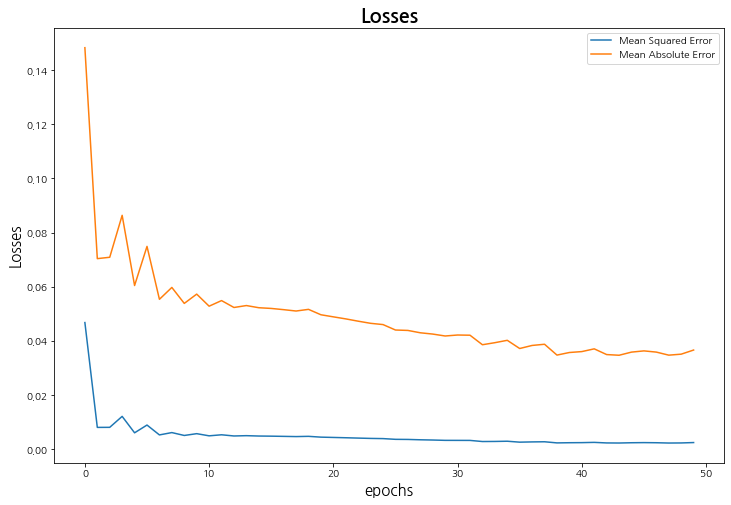

In [127]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [128]:
test_data = scaled_data[train_size - time_step:, :]

x_test = []
y_test = []

for i in range(time_step, len(test_data)):
    x_test.append(test_data[i-time_step:i, 0:n_col])
    y_test.append(test_data[i, 0:n_col])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_col))

In [129]:
m_lstm_Adam.evaluate(x_test, y_test)

31/31 [==============================] - 0s 7ms/step - loss: 0.0022 - mae: 0.0326


[0.0022125113755464554, 0.03261154890060425]

In [130]:
pred = m_lstm_Adam.predict(x_test)

31/31 [==============================] - 0s 6ms/step


In [131]:
pred.shape

(970, 1)

In [132]:
pred = scaler.inverse_transform(pred)
pred.shape

(970, 1)

In [133]:
y_test = scaler.inverse_transform(y_test)

In [134]:
df_pred = pd.DataFrame(data = 
                       {'predict' : pred.flatten(),
                       'actual' : y_test.flatten()})
df_pred

,predict,actual
0,2.263912,-1.42500
1,-0.406722,-0.21250
2,1.002044,1.47500
3,2.068391,3.38125
4,3.645389,5.05000
...,...,...
965,24.439699,26.24375
966,28.342121,25.86250
967,25.382753,26.88750
968,28.223265,27.40000


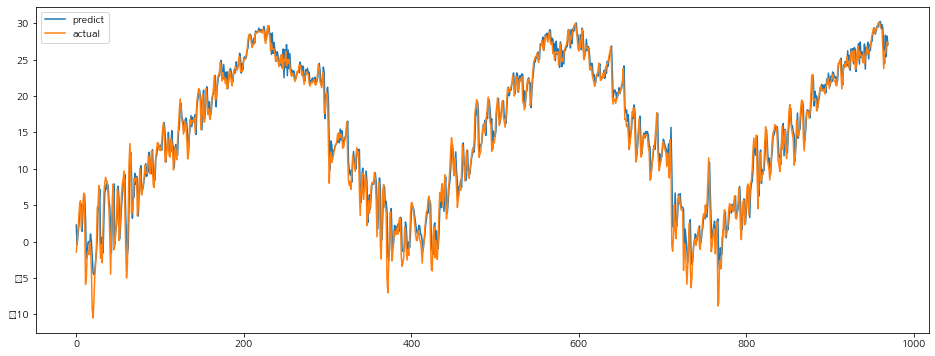

In [137]:
fig, axe = plt.subplots(figsize = (16, 6))
axe.plot(df_pred['predict'])
axe.plot(df_pred['actual'])
axe.legend(['predict', 'actual'])